Text(0, 0.5, '$h(t)$')

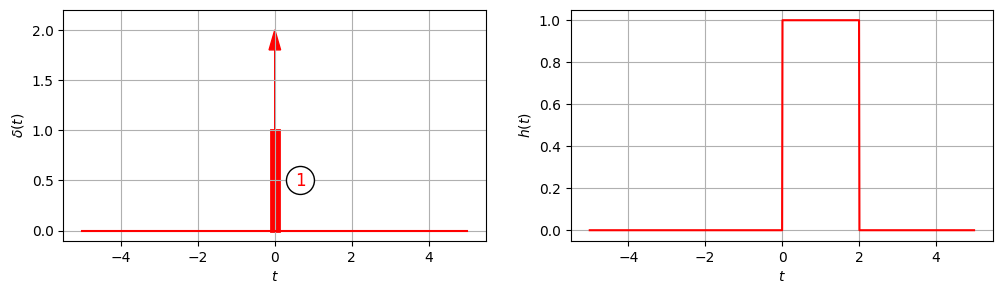

In [19]:
# ================= ISS: systems
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, ellipord, ellip

# >>>>>>>>>>>>>>>>> #dirac_h(t) <<<<<<<<<<<<<<<<<<<<<<<<<
# aprox ...
t = np.arange(-5,5,1/100)
delta = np.zeros(t.shape)

def draw_Dirac(t,t0,x0,mighteness,fig):
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ...
    # t je cela cas. osa. t0 je kde Dirac sedi, x0 jak ho chceme vysoky (obdelnicek bude 1/2 z toho)
    # mighteness je mocnost, fig pointer na obrazek. Baseline se nekresli.
    # bude na 1/50 obrazku...
    tfrom = t0-(np.max(t) - np.min(t))/100
    tto =   t0+(np.max(t) - np.min(t))/100
    ttocircle = t0+(np.max(t) - np.min(t))/15
    xfrom = 0
    xto = x0/2
    fig.arrow(t0, 0, 0,x0, head_width=0.3, head_length=0.1*x0, length_includes_head=True, fc='red', ec='red')
    fig.fill([tfrom, tto, tto, tfrom],[xfrom, xfrom, xto, xto],color='r',fill=True,linewidth =2)
    [ymin,ymax]=fig.get_ylim()
    fig.set_ylim(ymin,1.1*x0)
    fig.text(ttocircle, x0/4, mighteness, size=12,ha="center", va="center",
             bbox=dict(boxstyle="circle",fc='white'), color='red')


_, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(t,delta,color='r')
draw_Dirac(t,0,2,1,ax[0])
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$\delta(t)$')

h = np.zeros(delta.shape)
h[(t>=0) & (t<=2)] = 1
ax[1].plot(t,h,color='r')
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h(t)$')

In [20]:
# >>>>>>>>>>>>>>>>> #convolution <<<<<<<<<<<<<<<<<<<<<<<<<
x = [4,  4,  4,  4,  0,  0,  0,  0]
h = [0.25,  -0.25,  0.25,  -0.25]
# convolution
y = np.convolve(x,h)
print(y)
# demo of commutativity
y = np.convolve(h,x)
print(y)
# the same as filtering ...
y = lfilter(h,1,x)
print(y)

[ 1.  0.  1.  0. -1.  0. -1.  0.  0.  0.  0.]
[ 1.  0.  1.  0. -1.  0. -1.  0.  0.  0.  0.]
[ 1.  0.  1.  0. -1.  0. -1.  0.]


Text(137.72222222222223, 0.5, '$h(t)$')

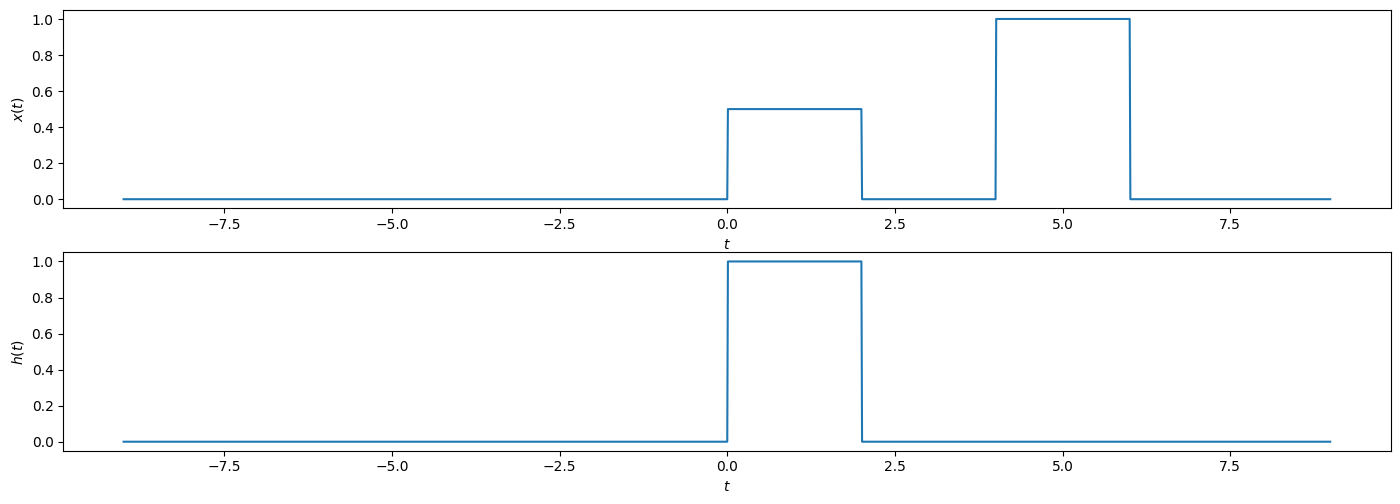

In [21]:
# >>>>>>>>>>>>>>>>> #continuous_convolution <<<<<<<<<<<<<<<<<<<<<<<<<
DELTA = 1/100
t = np.arange(-9,9,DELTA)
h = np.zeros(t.shape)
h[(t>=0) & (t<=2)] = 1
x = np.zeros(t.shape)
x[(t>=0) & (t<=2)] = 0.5
x[(t>=4) & (t<=6)] = 1

fig, ax = plt.subplots(2,1,figsize=(14,5))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,h)
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h(t)$')

interactive(children=(FloatSlider(value=0.0, description='t_todo', max=8.1, min=-7.5), Output()), _dom_classes…

<function __main__.plot_convolution(t_todo, DELTA, x)>

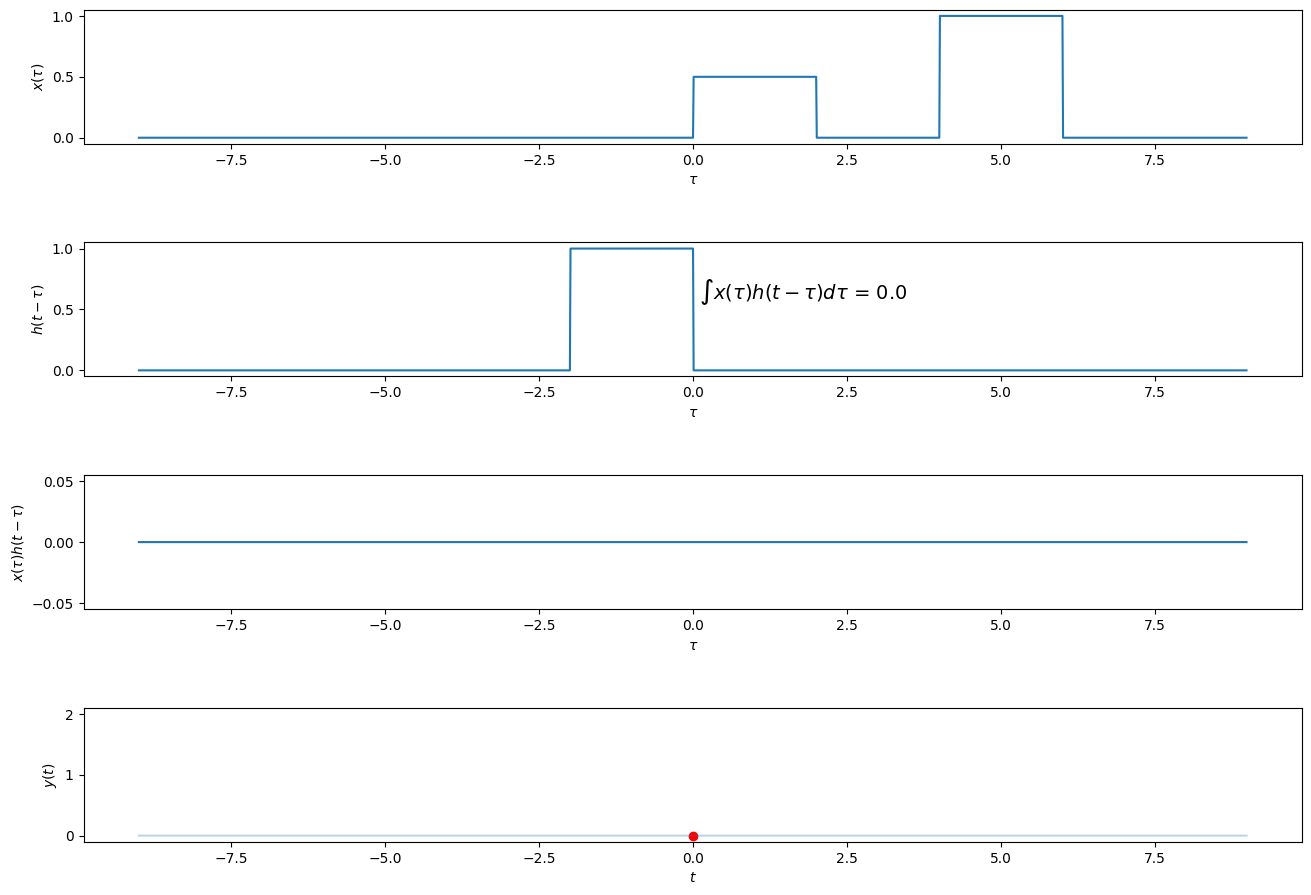

In [22]:
# convolution for one particular time ...
# thanks Samuel Stolarik who made it run interactively !
# ... pred pouzitim je potreba spustit minulou bunku.
# ... v Colabu se BOhu zel pri pohnuti slideru stale generuji nove ploty ... budu vdecny, pokud to nekdo vyresi ...
from ipywidgets import interact, fixed, FloatSlider
from IPython.display import display, clear_output

def plot_convolution(t_todo, DELTA, x):
    tau = np.arange(-9,9,DELTA)
    t_minus_tau = -tau+t_todo
    h_flipped_shifted = np.zeros(t.shape)
    h_flipped_shifted[(t_minus_tau>=0) & (t_minus_tau<=2)] = 1

    x_times_h_flipped_shifted = x * h_flipped_shifted
    y = np.sum(x_times_h_flipped_shifted) * DELTA

    fig, ax = plt.subplots(4,1,figsize=(14,10))
    fig.tight_layout(pad=5.0)

    ax[0].plot(tau,x)
    ax[0].set_xlabel(r'$\tau$')
    ax[0].set_ylabel(r'$x(\tau)$')

    ax[1].plot(tau,h_flipped_shifted)
    ax[1].set_xlabel(r'$\tau$')
    ax[1].set_ylabel(r'$h(t-\tau)$')

    ax[2].plot(tau,x_times_h_flipped_shifted)
    ax[2].set_xlabel(r'$\tau$')
    ax[2].set_ylabel(r'$x(\tau)h(t-\tau)$')
    ax[2].fill(tau,x_times_h_flipped_shifted,color='r',alpha=0.5)
    ax[2].text(t_todo+0.1, 0.2, rf'$\int x(\tau)h(t-\tau) d\tau$ = {y}',fontsize=14)

    ax[3].plot(t,np.zeros(t.shape),alpha=0.3)
    ax[3].scatter(t_todo, y, color='r')
    ax[3].set_xlabel(r'$t$')
    ax[3].set_ylabel(r'$y(t)$')
    ax[3].set_ylim((-0.1,2.1))
    print("working with ", t_todo)

interact(plot_convolution, t_todo=FloatSlider(min=-7.5, max=8.1, step=0.1, value=0.0), DELTA=fixed(DELTA), x=fixed(x))


(1800,) (3600,) (3599,)


Text(128.97222222222223, 0.5, '$y(t)$')

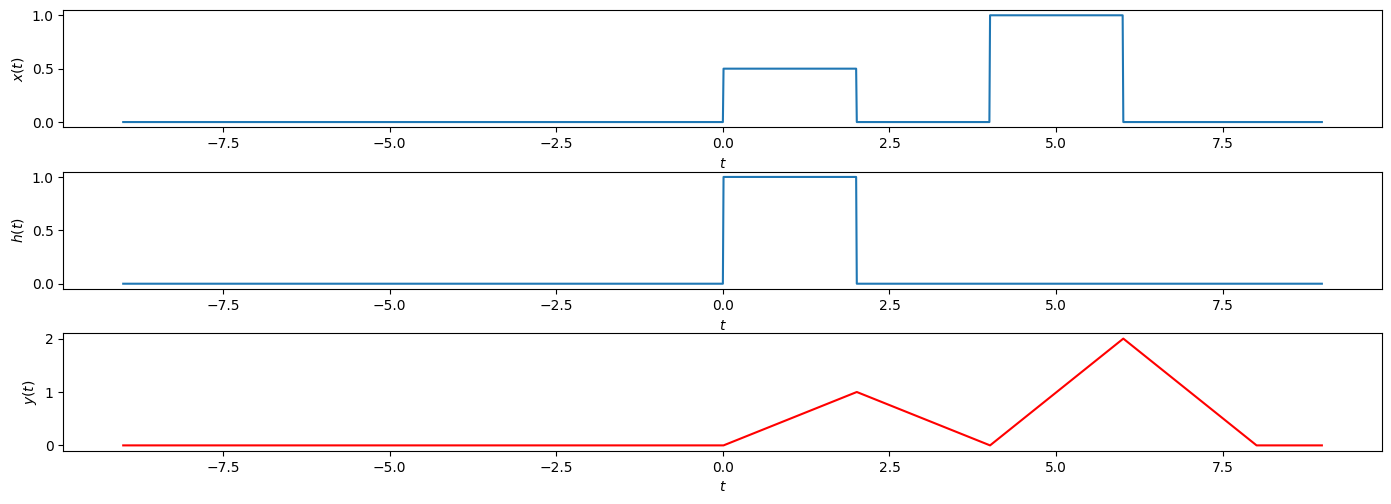

In [23]:
# convolution - the whole thing
y = np.convolve(x,h) * DELTA
longtime = np.arange(-9-9,9+9,DELTA)  # "prasacky" but no time to do it better ...
print(t.shape, longtime.shape,y.shape)
ii = np.argwhere((longtime >=-9) & (longtime <= 9))
t_show = longtime[ii]
y_show = y[ii]

fig, ax = plt.subplots(3,1,figsize=(14,5))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,h)
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h(t)$')

ax[2].plot(t_show,y_show,color='r')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')

Text(87.72222222222221, 0.5, '$y(t)$')

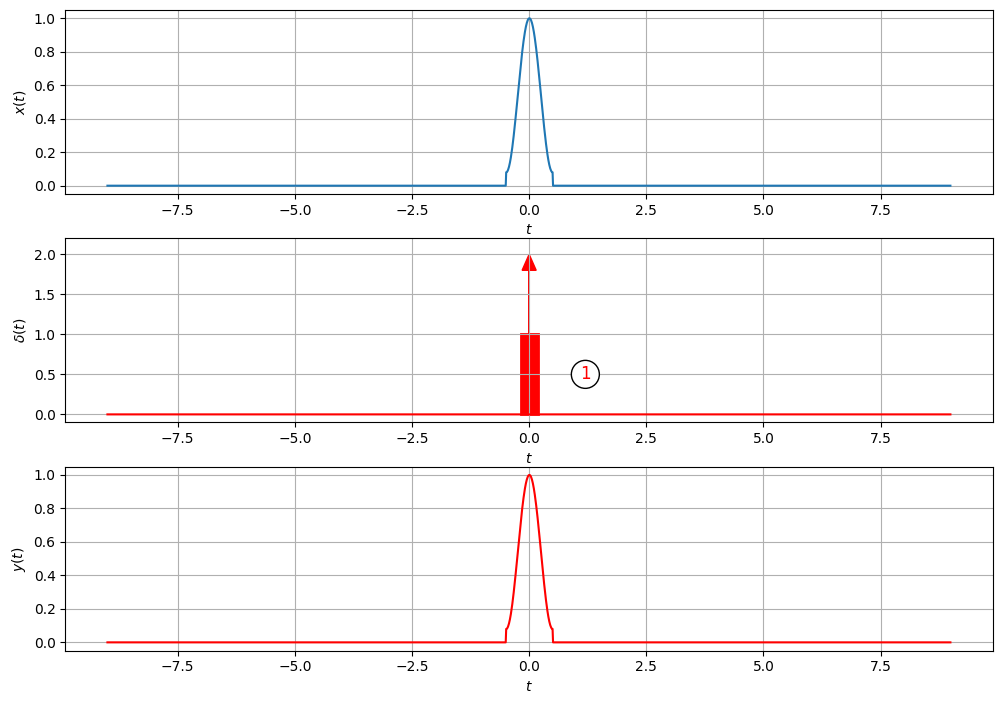

In [24]:
# >>>>>>>>>>>>>>>>> #convolution_diracs <<<<<<<<<<<<<<<<<<<<<<<<<
DELTA = 1/100
t = np.arange(-9,9,DELTA)
WIDTH_SIG = 0.5
ii = np.argwhere((t>-WIDTH_SIG) & (t<WIDTH_SIG)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
x = np.zeros(t.shape)
x[ii] = ham

# one Dirac
fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,np.zeros(t.shape),color='r')
draw_Dirac(t,0,2,1,ax[1])
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$\delta(t)$')

ax[2].plot(t,x,color='r')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')

Text(87.72222222222221, 0.5, '$y(t)$')

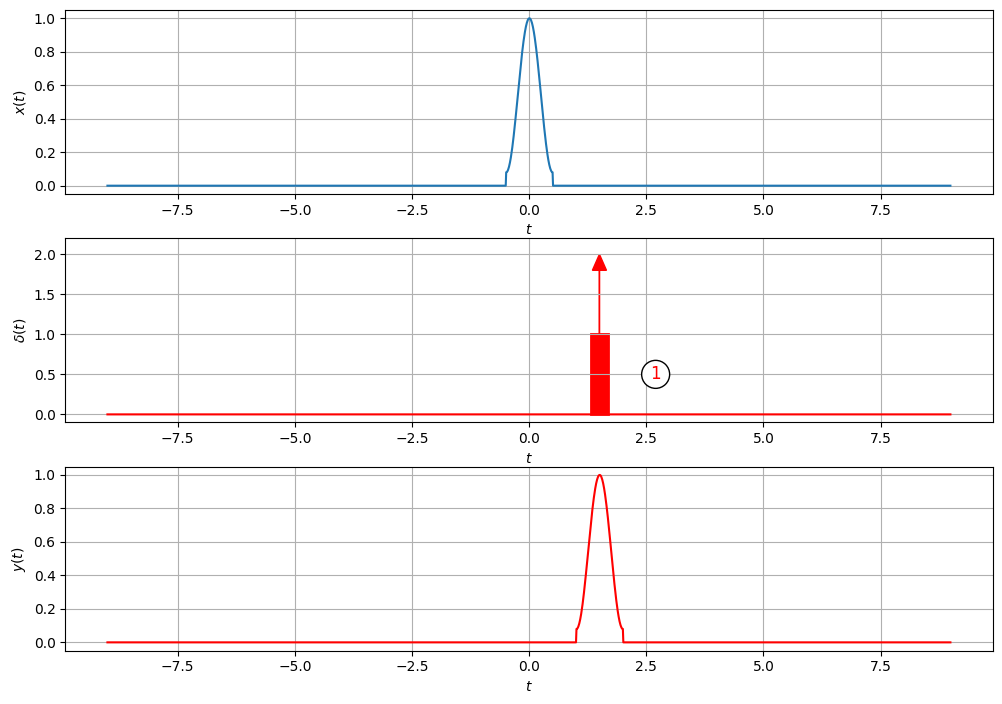

In [25]:
# one shifted Dirac
y = np.zeros(t.shape)
TAU = 1.5
WIDTH_SIG = 0.5
ii = np.argwhere((t>-WIDTH_SIG+TAU) & (t<WIDTH_SIG+TAU)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
y[ii] = ham

fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,np.zeros(t.shape),color='r')
draw_Dirac(t,TAU,2,1,ax[1])
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$\delta(t)$')

ax[2].plot(t,y,color='r')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')

Text(87.72222222222221, 0.5, '$y(t)$')

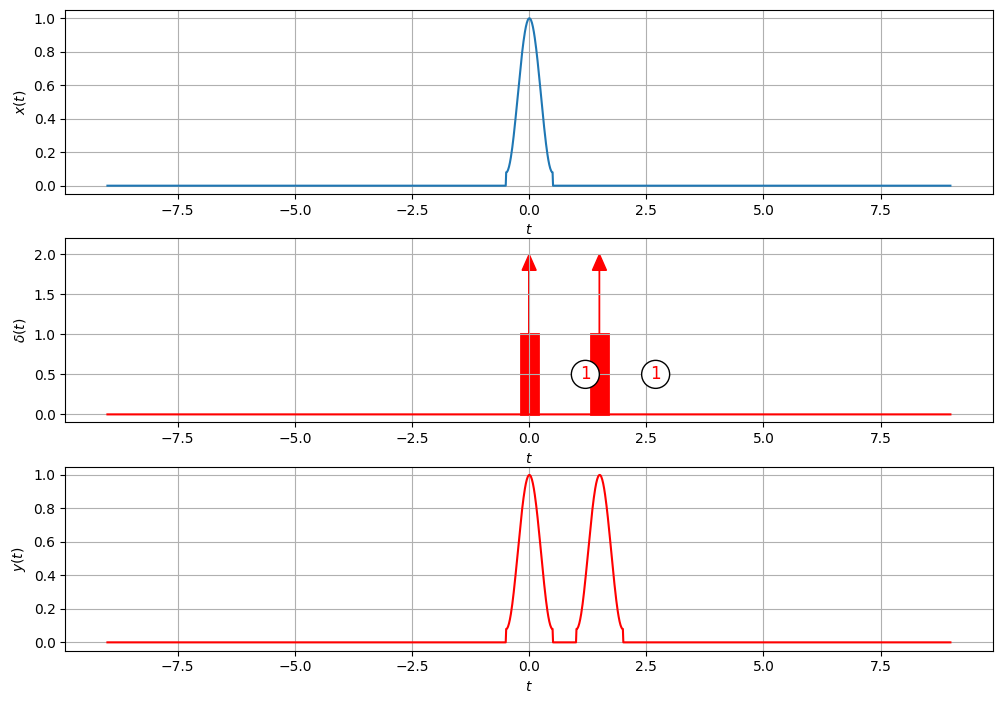

In [26]:
# 2 shifted Diracs - no aliasing
y = np.zeros(t.shape)
TAU = 1.5
WIDTH_SIG = 0.5
ii = np.argwhere((t>-WIDTH_SIG) & (t<WIDTH_SIG)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
y[ii] = y[ii] + ham
ii = np.argwhere((t>-WIDTH_SIG+TAU) & (t<WIDTH_SIG+TAU)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
y[ii] = y[ii] + ham

fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,np.zeros(t.shape),color='r')
draw_Dirac(t,TAU,2,1,ax[1])
draw_Dirac(t,0,2,1,ax[1])
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$\delta(t)$')

ax[2].plot(t,y,color='r')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')

Text(87.72222222222221, 0.5, '$y(t)$')

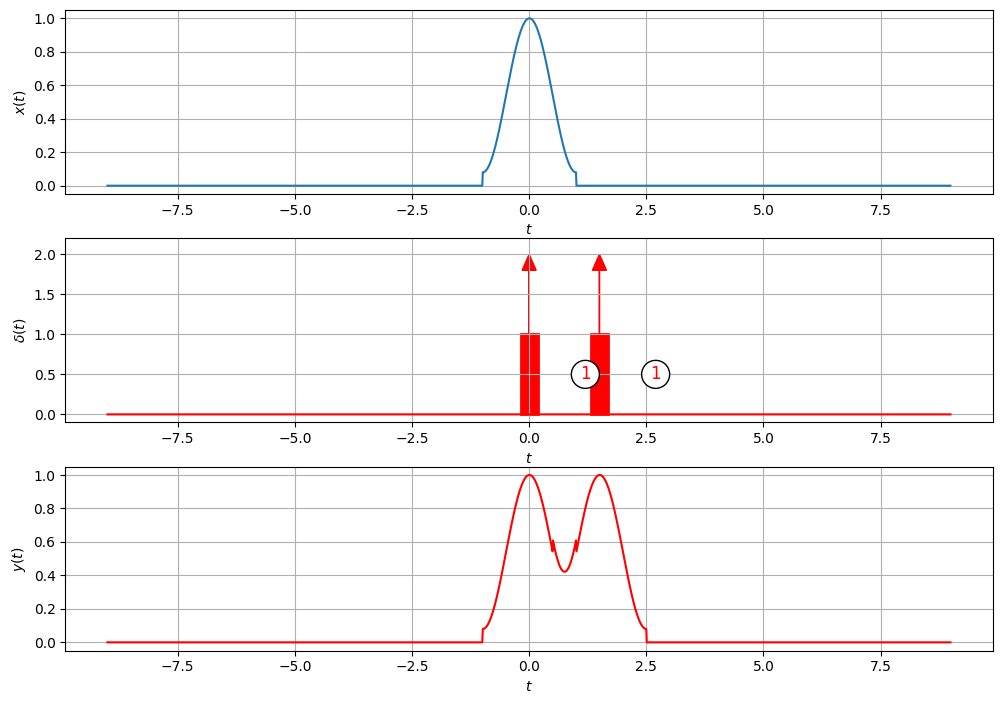

In [27]:
# 2 shifted Diracs - yes aliasing
y = np.zeros(t.shape)
TAU = 1.5
WIDTH_SIG = 1
ii = np.argwhere((t>-WIDTH_SIG) & (t<WIDTH_SIG)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
x = np.zeros(t.shape)
x[ii] = ham
y[ii] = y[ii] + ham
ii = np.argwhere((t>-WIDTH_SIG+TAU) & (t<WIDTH_SIG+TAU)).flatten() # does not work without it :(
ham = np.hamming(ii.size)
y[ii] = y[ii] + ham

fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,np.zeros(t.shape),color='r')
draw_Dirac(t,TAU,2,1,ax[1])
draw_Dirac(t,0,2,1,ax[1])
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$\delta(t)$')

ax[2].plot(t,y,color='r')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')


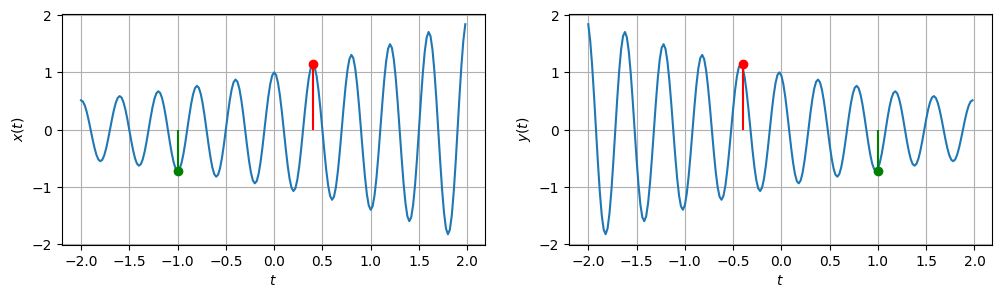

In [28]:
# >>>>>>>>>>>>>>>>> #causality <<<<<<<<<<<<<<<<<<<<<<<<<
def f(t):
    return np.cos(5*np.pi*t) * np.exp(t/3)

# non-causal system
t = np.arange(-2,2,2/100)
x = f(t)
t1 = 0.4
t2 = -1
x1 = f(t1)
x2 = f(t2)

y= np.flip(x)

_, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(t,x)
ax[0].stem([t1], [x1], basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].stem([t2], [x2], basefmt=" ",linefmt='g',markerfmt='go')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].grid()

ax[1].plot(t,y)
ax[1].stem([-t1], [x1], basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].stem([-t2], [x2], basefmt=" ",linefmt='g',markerfmt='go')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$y(t)$')
ax[1].grid()

#plt.savefig('FIG/non_causal.pdf')

Text(0.5, 1.0, '$y(t)$')

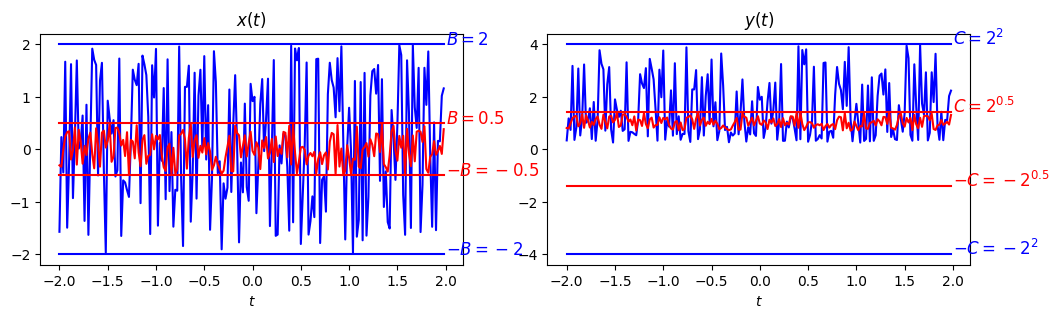

In [29]:
# >>>>>>>>>>>>>>>>> #stability <<<<<<<<<<<<<<<<<<<<<<<<<
t = np.arange(-2,2,2/100)
x1 = np.random.uniform(size=t.shape)-0.5
x2 = 4*np.random.uniform(size=t.shape)-2
y1 = np.power(2,x1)
y2 = np.power(2,x2)
B1 = 0.5
C1 = np.power(2,B1)
B2 = 2
C2 = np.power(2,B2)

_, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(t,x2, color='b')
ax[0].plot(t,x1, color='r')
ax[0].plot(t,B1*np.ones(t.shape),color='r')
ax[0].plot(t,-B1*np.ones(t.shape),color='r')
ax[0].plot(t,B2*np.ones(t.shape),color='b')
ax[0].plot(t,-B2*np.ones(t.shape),color='b')
ax[0].text(2,B1,'$B=0.5$',color='r',fontsize=12)
ax[0].text(2,-B1,'$-B=-0.5$',color='r',fontsize=12)
ax[0].text(2,B2,'$B=2$',color='b',fontsize=12)
ax[0].text(2,-B2,'$-B=-2$',color='b',fontsize=12)
ax[0].set_xlabel('$t$')
ax[0].set_title('$x(t)$')

ax[1].plot(t,y2, color='b')
ax[1].plot(t,y1, color='r')
ax[1].plot(t,C1*np.ones(t.shape),color='r')
ax[1].plot(t,-C1*np.ones(t.shape),color='r')
ax[1].plot(t,C2*np.ones(t.shape),color='b')
ax[1].plot(t,-C2*np.ones(t.shape),color='b')
ax[1].text(2,C1,'$C=2^{0.5}$',color='r',fontsize=12)
ax[1].text(2,-C1,'$-C=-2^{0.5}$',color='r',fontsize=12)
ax[1].text(2,C2,'$C=2^{2}$',color='b',fontsize=12)
ax[1].text(2,-C2,'$-C=-2^{2}$',color='b',fontsize=12)
ax[1].set_xlabel('$t$')
ax[1].set_title('$y(t)$')

#plt.savefig('FIG/stabilita.pdf')

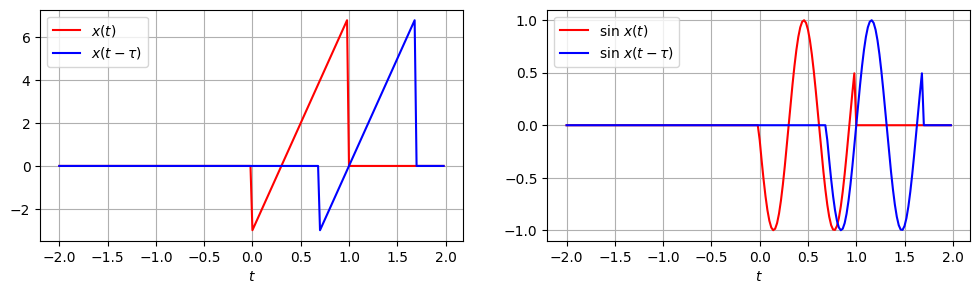

In [30]:
# >>>>>>>>>>>>>>>>> #time_invariance <<<<<<<<<<<<<<<<<<<<<<<<<
# time invariant
t = np.arange(-2,2,2/100)
x1 = np.zeros(t.shape)
indices = np.argwhere((t > 0) & (t < 1))
xinject = t[indices]*10 -3
x1[indices] = xinject
x2 = np.zeros(t.shape)
indices = np.argwhere((t > 0.7) & (t < 1.7))
x2[indices] = xinject

y1=np.sin(x1)
y2=np.sin(x2)

_, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(t,x1, color='r',label='$x(t)$')
ax[0].plot(t,x2, color='b',label='$x(t-\\tau)$')
ax[0].set_xlabel('$t$')
ax[0].legend()
ax[0].grid()
ax[1].plot(t,y1, color='r',label='sin $x(t)$')
ax[1].plot(t,y2, color='b',label='sin $x(t-\\tau)$')
ax[1].set_xlabel('$t$')
ax[1].legend()
ax[1].grid()
#plt.savefig('FIG/cas_invar.pdf')

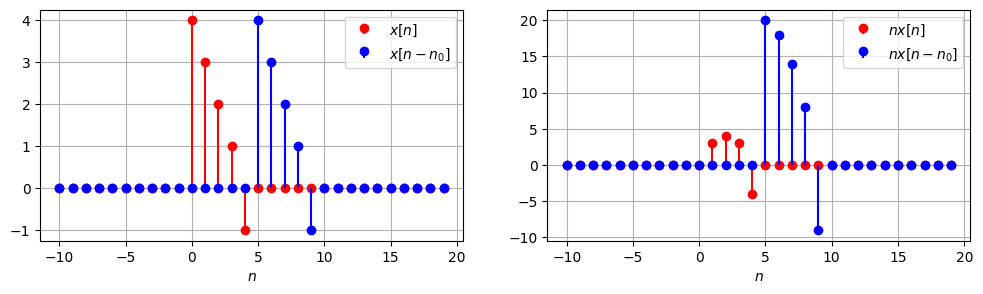

In [31]:
# time varying
n = np.arange(-10,20)
x1 = np.zeros(n.shape)
indices = np.arange(10,15)
xinject = [4,3,2,1,-1]
x1[indices] = xinject
x2 = np.zeros(n.shape)
x2[indices+5] = xinject

y1= n * x1
y2= n * x2

_, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].stem(n, x1, basefmt=" ",linefmt='r',markerfmt='ro',label='$x[n]$')
ax[0].stem(n, x2, basefmt=" ",linefmt='b',markerfmt='bo',label='$x[n-n_0]$')
ax[0].set_xlabel('$n$')
ax[0].legend()
ax[0].grid()

ax[1].stem(n, y1, basefmt=" ",linefmt='r',markerfmt='ro',label='$nx[n]$')
ax[1].stem(n, y2, basefmt=" ",linefmt='b',markerfmt='bo',label='$nx[n-n_0]$')
ax[1].set_xlabel('$n$')
ax[1].legend()
ax[1].grid()
#plt.savefig('FIG/cas_var.pdf')

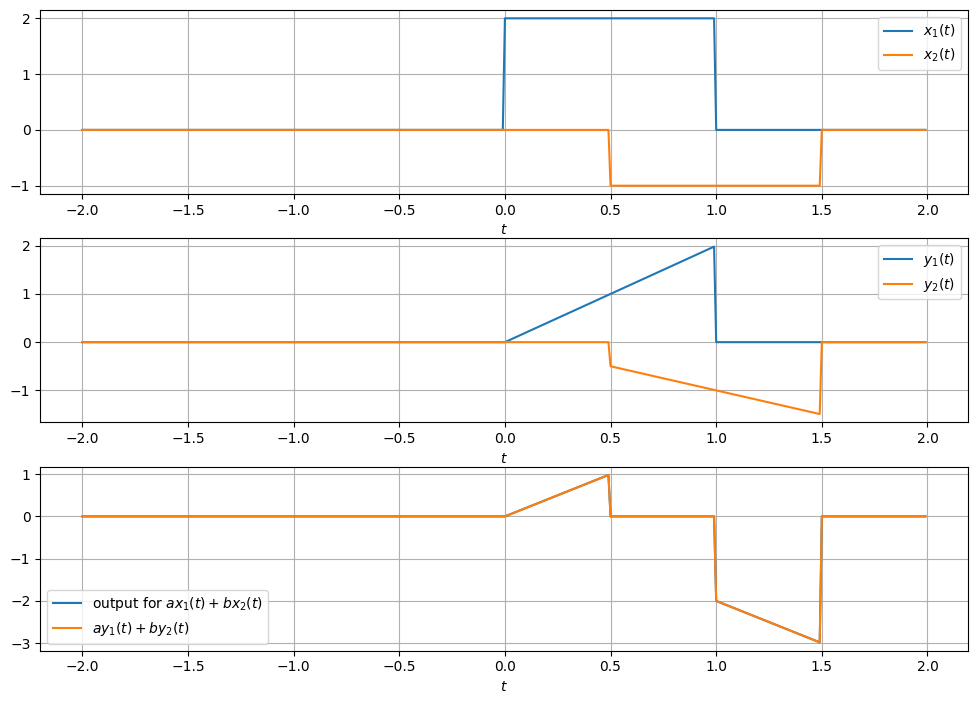

In [32]:
# >>>>>>>>>>>>>>>>> #linearity <<<<<<<<<<<<<<<<<<<<<<<<<
# linear
def system(x,t):
    return x * t

t = np.arange(-2,2,0.01)
x1 = np.zeros(t.shape)
x1[(t > 0) & (t < 1)] = 2
x2 = np.zeros(t.shape)
x2[(t > 0.5) & (t < 1.5)] = -1

a = 1   # <--- set consant here
b = 2   # <--- set consant here

y1 = system(x1,t)  #t * x1
y2 = system(x2,t)  #y2 = t * x2
ymix = system (a * x1 + b * x2,t)
ylin = a * y1 + b * y2

fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x1,label='$x_1(t)$')
ax[0].plot(t,x2,label='$x_2(t)$')
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].legend()

ax[1].plot(t,y1,label='$y_1(t)$')
ax[1].plot(t,y2,label='$y_2(t)$')
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].legend()

ax[2].plot(t,ymix,label='output for $ax_1(t) + bx_2(t)$')
ax[2].plot(t,ylin,label='$ay_1(t) + by_2(t)$')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].legend()


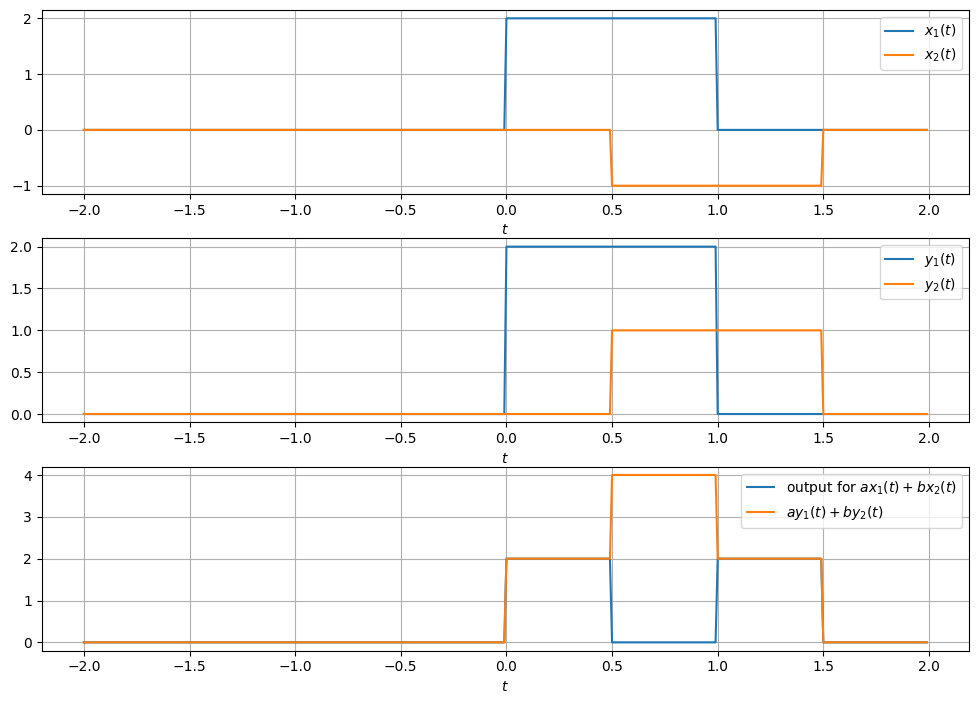

In [33]:
# nonlinear
def system(x,t):
    return np.abs(x)

t = np.arange(-2,2,0.01)
x1 = np.zeros(t.shape)
x1[(t > 0) & (t < 1)] = 2
x2 = np.zeros(t.shape)
x2[(t > 0.5) & (t < 1.5)] = -1

a = 1   # <--- set consant here
b = 2   # <--- set consant here

y1 = system(x1,t)  #t * x1
y2 = system(x2,t)  #y2 = t * x2
ymix = system (a * x1 + b * x2,t)
ylin = a * y1 + b * y2

fig, ax = plt.subplots(3,1,figsize=(10,7))
fig.tight_layout()
ax[0].plot(t,x1,label='$x_1(t)$')
ax[0].plot(t,x2,label='$x_2(t)$')
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].legend()

ax[1].plot(t,y1,label='$y_1(t)$')
ax[1].plot(t,y2,label='$y_2(t)$')
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].legend()

ax[2].plot(t,ymix,label='output for $ax_1(t) + bx_2(t)$')
ax[2].plot(t,ylin,label='$ay_1(t) + by_2(t)$')
ax[2].grid()
ax[2].set_xlabel('$t$')
ax[2].legend()


In [34]:
np.convolve([3,2,-1,6],[4,-2,1,-7])

array([ 12,   2,  -5,   7, -27,  13, -42])